In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Data Imput

In [75]:
numbers = pd.read_csv('train.csv')
numbers.head(10)

,4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
numbers.shape

(16999, 1025)

## Check Label Column

In [77]:
np.unique(numbers['4'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
numbers['4'].value_counts()

8    1700
5    1700
6    1700
2    1700
3    1700
9    1700
0    1700
7    1700
1    1700
4    1699
Name: 4, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


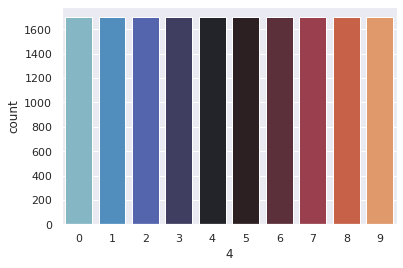

In [79]:
#visualize the label column
sns.countplot(numbers['4'],palette = 'icefire')

Text(0.5, 1.0, 'Digit 6')

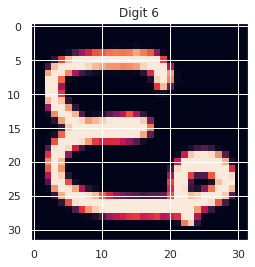

In [80]:
#visualize some digits
six = numbers.iloc[2, 1:]
six = six.values.reshape(32,32)
plt.imshow(six)
plt.title("Digit 6")

Text(0.5, 1.0, 'Digit 5')

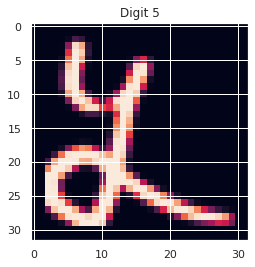

In [81]:
five = numbers.iloc[1, 1:]
five = five.values.reshape(32,32)
plt.imshow(five)
plt.title("Digit 5")

Text(0.5, 1.0, 'Digit 8')

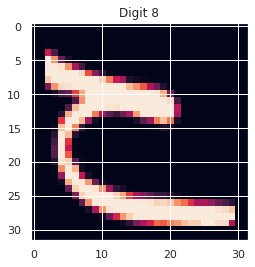

In [82]:
eight = numbers.iloc[0, 1:]
eight = eight.values.reshape(32,32)
plt.imshow(eight)
plt.title("Digit 8")

## Data Preparation

In [83]:
pd.set_option('display.max_rows', 999)
round(numbers.drop('4', axis=1).mean(), 2).sort_values(ascending = False)

0.143    133.07
0.142    132.86
0.141    132.44
0.140    132.26
0.144    131.83
          ...  
0.235      0.00
0.219      0.00
0.218      0.00
0.217      0.00
0.562      0.00
Length: 1024, dtype: float64

In [84]:
# splitting into X and y
X = numbers.drop("4", axis = 1)
y = numbers['4']

In [85]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2,test_size = 0.8, random_state = 101)

In [86]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (3399, 1024)
y_train shape: (3399,)
X_test shape: (13600, 1024)
y_test shape: (13600,)


## Build the SVM model

### linear model

In [87]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
# predict
y_pred = model_linear.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")


accuracy: 0.9519117647058823 



### Poly model

In [89]:
# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)


SVC(kernel='poly')

In [90]:
# predict
y_pred = non_linear_model_poly.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9723529411764706 



### rbf model

In [91]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

SVC()

In [92]:
# predict
y_pred = non_linear_model.predict(X_test)
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9783823529411765 



In [93]:
# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9806617647058824 

[[1357    0    0    0    0    0    2    0    3    2]
 [   0 1345    1    1    3    1    1    0    0    3]
 [   0    1 1331   35    0    5    8    3    1    0]
 [   0    0   76 1261    1    6    5    1    0    4]
 [   0    3    4    0 1325    2    3    3    2    7]
 [   1    0    7    2    6 1333    0    3    0    0]
 [   1    3    0    2    1    5 1328    5    1    3]
 [   4    1    0    1    4    4    6 1350    1    0]
 [   5    0    0    0    5    1    0    0 1339    0]
 [   1    2    1    0    0    0    0    0    0 1368]] 



In [94]:
#visualize the accuracy for different digits
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1364
           1       0.99      0.99      0.99      1355
           2       0.94      0.96      0.95      1384
           3       0.97      0.93      0.95      1354
           4       0.99      0.98      0.98      1349
           5       0.98      0.99      0.98      1352
           6       0.98      0.98      0.98      1349
           7       0.99      0.98      0.99      1371
           8       0.99      0.99      0.99      1350
           9       0.99      1.00      0.99      1372

    accuracy                           0.98     13600
   macro avg       0.98      0.98      0.98     13600
weighted avg       0.98      0.98      0.98     13600



## Use the model on test dataset

In [95]:
test_case = pd.read_csv("test.csv")
test_case.head(10)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
test_case.shape

(2999, 1025)

In [97]:
#predict
test_pixel = test_case.drop("7", axis = 1)
test_label = test_case['7']

In [98]:
test_scaled = scale(test_pixel)

In [99]:
test_predict = model.predict(test_scaled)

In [100]:
print("accuracy", metrics.accuracy_score(test_label, test_predict), "\n")

accuracy 0.9819939979993331 



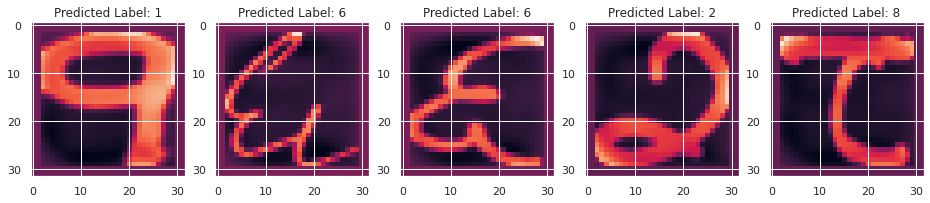

In [101]:
df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(32,32)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()